<a href="https://colab.research.google.com/github/shakhawat17/Data-Science/blob/main/Assignment_5_Data_Preprocessing_and_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
#Load the Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# TODO: Load the housing data
df = pd.read_csv('Housing.csv')

# TODO: How many houses are there?
print(f"Number of houses: ___")  # Fill this

# TODO: Show first 3 houses
# Your code here

Number of houses: ___


# --- Step 1: Import necessary libraries ---

In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#--- Step 2: Load the housing data ---

In [ ]:
from google.colab import files

In [150]:
uploaded = files.upload()

Saving Housing.csv to Housing (3).csv


In [151]:
df = pd.read_csv('Housing.csv')

# Convert Yes/No columns to 1/0 right after loading the data
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in yes_no_cols:
    # Use np.where for a more robust conversion that handles potential non-'yes'/'no' values
    df[col] = np.where(df[col] == 'yes', 1, 0)

# --- Step 3: How many houses are there? ---

In [152]:
num_houses = df.shape[0]   # Number of rows = number of houses
print(f"Number of houses: {num_houses}")

Number of houses: 545


# --- Step 4: Show first 3 houses ---

In [153]:
print("\nFirst 3 houses in the dataset:")
display(df.head(3))


First 3 houses in the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished


In [154]:
# Look at Columns
# TODO: Show all column names
print("Columns:")
# Your code here

# TODO: Show data types of columns
print("Data types:")

Columns:
Data types:


# --- Show all column names ---

In [155]:
print("Columns:")
print(df.columns.tolist())

Columns:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


# --- Show data types of columns ---

In [156]:
print("\nData types:")
print(df.dtypes)


Data types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea             int64
furnishingstatus    object
dtype: object


In [157]:
#Convert Yes/No to 1/0
# Check what's in our data
print("Current mainroad values:", df['mainroad'].head())
# Shows: yes, no, yes, yes, no

# Models need numbers, not text!
# We need: yes → 1, no → 0

Current mainroad values: 0    1
1    1
2    1
3    1
4    1
Name: mainroad, dtype: int64


# --- Convert Yes/No columns to 1/0 ---
# Example with 'mainroad'

In [158]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})

# --- Check the result ---

In [159]:
print("Converted mainroad values:", df['mainroad'].head())

Converted mainroad values: 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: mainroad, dtype: float64


In [160]:
# Split into Train and Test
# TODO: Split - 80% train, 20% test

# --- Step 1: Define features (X) and target (y) ---

# Example: assume 'price' is the target variable

In [161]:
X = df.drop('price', axis=1)
y = df['price']

# --- Step 2: Split into train & test (80% / 20%) ---

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 436
Test set size: 109


In [163]:
#Apply StandardScaler
# Area is huge (1650-13300), Bedrooms is small (1-6)!
#Your Code here

# --- Step 1: Initialize the scaler ---

In [164]:
scaler = StandardScaler()

# --- Step 2: Fit on training data & transform both train and test ---

In [165]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Assuming all columns except target are numeric and should be scaled

# ----Quick look at data ---

In [166]:
print(f"\nNumber of houses: {df.shape[0]}")
print("\nColumns:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)


Number of houses: 545

Columns:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Data types:
price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad            float64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking               int64
prefarea              int64
furnishingstatus     object
dtype: object


# ---  Convert Yes/No columns to 1/0 ---

In [167]:
# This step is no longer needed as the conversion is done earlier
# yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# for col in yes_no_cols:
#     df[col] = df[col].map({'yes': 1, 'no': 0})

# Verify conversion

In [168]:
print("\nCheck conversions (first 5 rows):")
display(df[yes_no_cols].head())


Check conversions (first 5 rows):


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,NaN,0,0,0,1,1
1,NaN,0,0,0,1,0
2,NaN,0,1,0,0,1
3,NaN,0,1,0,1,1
4,NaN,1,1,0,1,0


# --- Step 5: Split into features and target ---

In [169]:
X = df.drop('price', axis=1)
y = df['price']

# --- Step 6: Train-test split (80% train, 20% test) ---

In [170]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nTrain set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 436
Test set size: 109


# --- Step 7: Scale numeric features ---

In [171]:
scaler = StandardScaler()

# All columns in X are numeric after conversion

In [172]:
scaler = StandardScaler()
# Exclude 'furnishingstatus' from numeric columns for scaling
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('mainroad') # mainroad is already converted to 1/0

In [173]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [174]:
# Apply scaling only to numeric columns (excluding 'furnishingstatus' and 'mainroad')
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\nScaled training features (first 5 rows):")
display(pd.DataFrame(X_train_scaled, columns=X_train.columns).head()) # Display all columns for context


Scaled training features (first 5 rows):


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,0.384168,0.055271,1.539173,2.587644,NaN,-0.466773,-0.746420,-0.230521,1.501243,0.367957,-0.552620,furnished
93,0.929181,0.055271,1.539173,-0.912499,NaN,-0.466773,1.339728,-0.230521,1.501243,2.709987,-0.552620,semi-furnished
335,-0.607755,-1.283514,-0.557950,-0.912499,NaN,-0.466773,1.339728,-0.230521,1.501243,1.538972,-0.552620,furnished
412,-1.155492,0.055271,-0.557950,0.254215,NaN,-0.466773,1.339728,-0.230521,-0.666115,-0.803059,1.809561,unfurnished
471,-0.637730,0.055271,-0.557950,0.254215,NaN,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,unfurnished


In [175]:
#train and test model
#your code here

# --- Step 0: Upload CSV ---

In [176]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing (4).csv


# --- Step 1: Import libraries ---

In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- Step 2: Load dataset ---

In [179]:
df = pd.read_csv("Housing.csv")
print("✅ File loaded successfully!")

✅ File loaded successfully!


# --- Step 3: Quick look at data ---

In [180]:
print(f"\nNumber of houses: {df.shape[0]}")
print("\nColumns:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)



Number of houses: 545

Columns:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Data types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


# --- Step 4: Convert Yes/No columns to 1/0 ---

In [181]:
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in yes_no_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


# --- Step 5: Split into features and target ---

In [182]:
X = df.drop('price', axis=1)
y = df['price']

# --- Step 6b: Reset index to avoid KeyErrors ---

In [183]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


# --- Step 7: Identify columns for preprocessing ---

In [184]:
categorical_features = ['furnishingstatus']
binary_features = yes_no_cols
numeric_features = [col for col in X_train.columns if col not in categorical_features + binary_features]


# --- Step 8: Fill missing values in binary columns ---

In [185]:
for col in binary_features:
    train_mode = X_train[col].mode()
    test_mode = X_test[col].mode()

    if not train_mode.empty:
        X_train[col].fillna(train_mode[0], inplace=True)
    else:
        print(f"⚠️ No mode found for column '{col}' in training data.")

    if not test_mode.empty:
        X_test[col].fillna(test_mode[0], inplace=True)
    else:
        print(f"⚠️ No mode found for column '{col}' in test data.")





⚠️ No mode found for column 'mainroad' in training data.
⚠️ No mode found for column 'mainroad' in test data.


/tmp/ipython-input-1770545689.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(train_mode[0], inplace=True)
/tmp/ipython-input-1770545689.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

# --- Step 8: Define transformers with imputers ---

In [186]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



# --- Step 9: Define transformers for numeric and categorical columns ---

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# --- Step 10: Column transformer ---

In [187]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # binary columns are already imputed
)

# --- Step 11: Apply preprocessing ---

In [188]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# --- Step 12: Train Linear Regression model ---

In [189]:
import numpy as np

print("✅ Checking for NaNs in processed training data...")
print("NaNs in X_train_processed:", np.isnan(X_train_processed).sum())



✅ Checking for NaNs in processed training data...
NaNs in X_train_processed: 436


In [190]:
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ]
)



In [191]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model = LinearRegression()
model.fit(X_train_processed, y_train)
print("✅ Model trained successfully!")



✅ Model trained successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['mainroad']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['mainroad']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


# --- Step 13: Evaluate model ---

In [192]:
y_train_pred = model.predict(X_train_processed)
y_test_pred = model.predict(X_test_processed)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTraining MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Test MSE: {test_mse:.2f}, R²: {test_r2:.2f}")



Training MSE: 982292680893.21, R²: 0.68
Test MSE: 1789797955958.71, R²: 0.65


# --- Step 14: Visualize Actual vs Predicted Prices ---

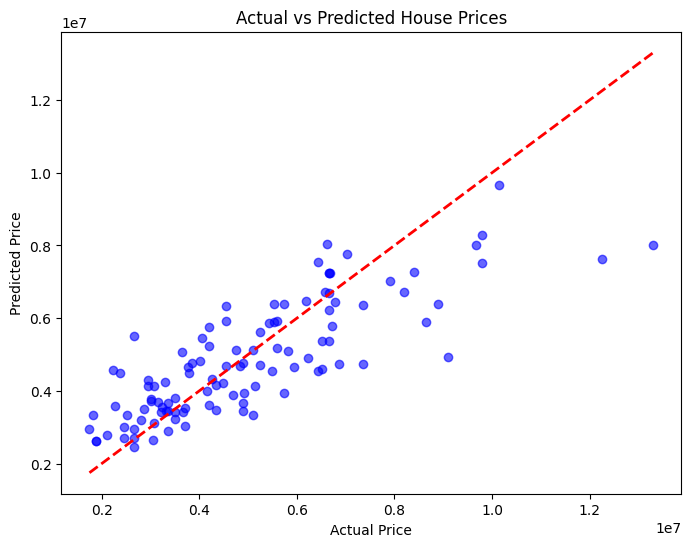

In [193]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()


# ---Predict a new house price ---

# New house details:
# area=5000, bedrooms=3, bathrooms=2, stories=2,
# mainroad=yes, guestroom=no, basement=yes,
# hotwaterheating=no, airconditioning=yes,
# parking=2, prefarea=yes, furnishingstatus=furnished
#your code here

In [194]:
# Transform the new house data using the fitted preprocessor
new_house_processed = preprocessor.transform(new_house_df)

# Predict the price
predicted_price = model.predict(new_house_processed)

print(f"\nPredicted price of the new house: ${predicted_price[0]:,.2f}")


Predicted price of the new house: $7,328,102.53


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['mainroad']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [195]:
new_house = {
    'area': [5000],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': [1],
    'guestroom': [0],
    'basement': [1],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [2],
    'prefarea': [1],
    'furnishingstatus': ['furnished'] # Include the original categorical column
}

In [197]:
new_house_df = pd.DataFrame(new_house)
# Ensure the new house DataFrame has the same columns as the training data before preprocessing
# The preprocessor will handle the column order and transformations
new_house_df = new_house_df[X_train.columns]